In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!which python
print(tf.__version__)

/home/lol/Desktop/Labs/AI/.venv/bin/python
2.2.0


In [2]:
import glob
import cv2

def read_glob(path):
    arr = []
    files = glob.glob(path)
    for filepath in sorted(files):
        img = cv2.imread(filepath,0)
        # print(img.shape)
        img = img.reshape(32*32)
        # print(img.shape)
        img = img / 255
        arr.append(img)
    return np.array(arr)

happy = read_glob("./crop/happy/happy_linq/*.png")
normal = read_glob("./crop/normal/normal_linq/*.png")
sad = read_glob("./crop/sad/sad_linq/*.png")



my_happy = read_glob("./crop/happy/happy/*.png")
my_normal = read_glob("./crop/normal/m/*.png")

my = np.concatenate([my_happy,my_normal])
kk = keras.utils.to_categorical(
    np.concatenate([
    np.array([0]*len(my_happy)),
    np.array([1]*len(my_normal))
    # np.array([2]*len(sad))
]),
    num_classes=3
)

images = np.concatenate([happy,normal,sad])
k = keras.utils.to_categorical(
    np.concatenate([
    np.array([0]*len(happy)),
    np.array([1]*len(normal)),
    np.array([2]*len(sad))
]),
    num_classes=3
)

In [3]:
model = keras.Sequential()
# model.add(keras.layers.Input(shape=(32,32),name="input"))
# model.add(keras.layers.Flatten(input_shape=(32,32), name="flat"))
model.add(keras.layers.Dense(32*2, activation='relu', name="process", input_dim=32*32))
model.add(keras.layers.Dense(3, activation='softmax', name="categorize"))

# model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(32,32,1)))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# # model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(320, activation='relu'))
# # model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.summary()


history = model.fit(images, k, epochs=30, validation_data=(my, kk), batch_size=4)

Epoch 1/30
66/66 [==============================] - 0s 5ms/step - loss: 1.3312 - accuracy: 0.3755 - val_loss: 1.1573 - val_accuracy: 0.4874
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 1.0261 - accuracy: 0.5441 - val_loss: 1.2289 - val_accuracy: 0.1457
Epoch 3/30
66/66 [==============================] - 0s 6ms/step - loss: 0.8717 - accuracy: 0.5824 - val_loss: 0.9816 - val_accuracy: 0.5879
Epoch 4/30
66/66 [==============================] - 0s 5ms/step - loss: 0.7663 - accuracy: 0.6667 - val_loss: 0.9563 - val_accuracy: 0.5327
Epoch 5/30
66/66 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.7739 - val_loss: 0.7202 - val_accuracy: 0.7387
Epoch 6/30
66/66 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.7816 - val_loss: 0.7305 - val_accuracy: 0.6332
Epoch 7/30
66/66 [==============================] - 0s 4ms/step - loss: 0.5773 - accuracy: 0.7701 - val_loss: 1.1639 - val_accuracy: 0.3568
Epoch 8/30
66/66 [==

In [4]:

# my_happy = read_glob("./crop/happy/happy/*.png")

test = model.evaluate(
    my,kk
)
print(test)


7/7 [==============================] - 0s 2ms/step - loss: 0.9062 - accuracy: 0.7739
[0.9062038660049438, 0.7738693356513977]


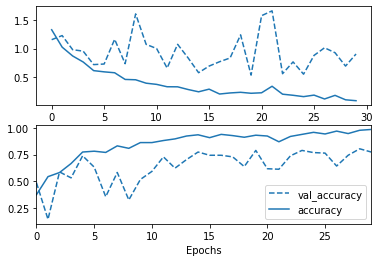

In [5]:

def plot_history(histories, keys=('loss','accuracy')):
    fig, axis = plt.subplots(2)

    for idx, key in enumerate(keys):
        for name, history in histories:
            val = axis[idx].plot(history.epoch, history.history["val_"+key],
                        '--', label="val_"+key)
            axis[idx].plot(history.epoch, history.history[key], color=val[0].get_color(),
                    label=key)

    plt.xlabel('Epochs')
    axis.flat[0].set(xlabel='x-label')
    plt.legend()

    plt.xlim([0,max(history.epoch)])
# plot_history([('test',test)])

plot_history([('one',history)])